In [ ]:
import io
import pandas as pd
import numpy as np
wine = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


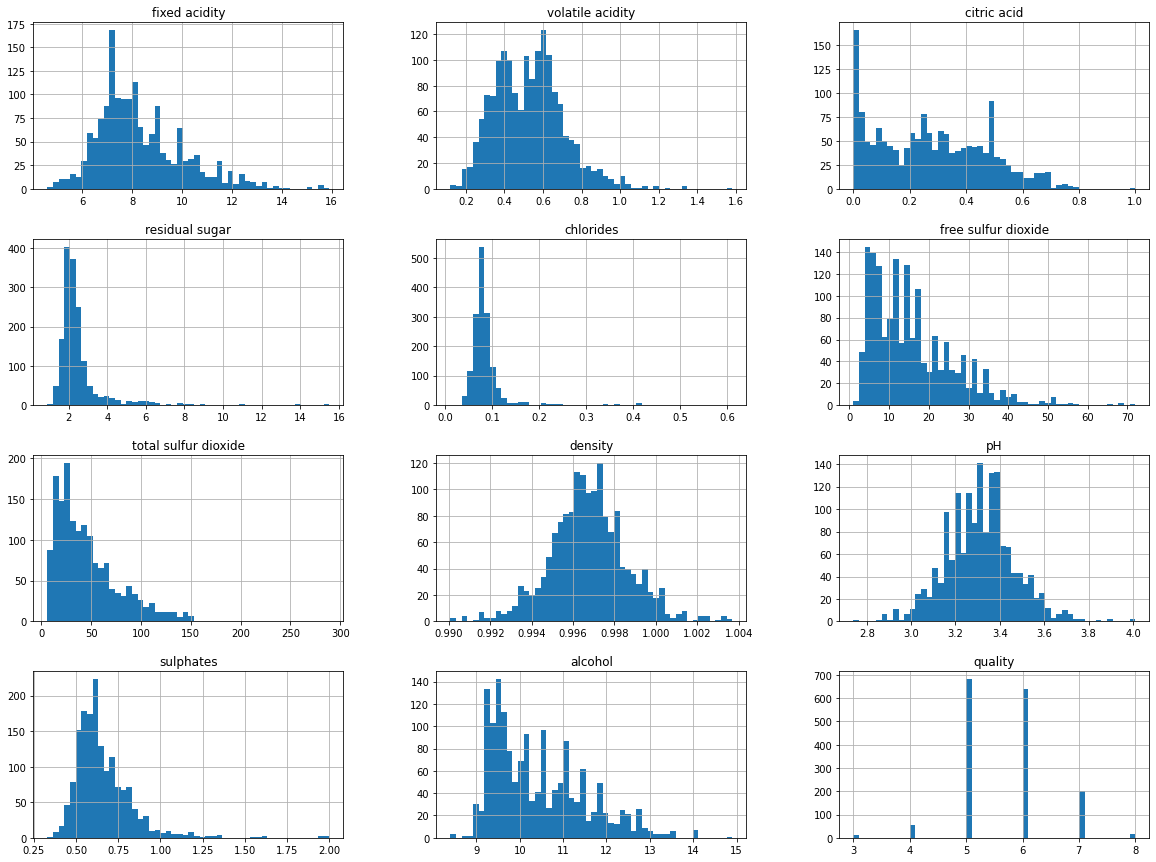

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
wine['Quality_cat'] = pd.cut(wine['quality'], bins=[0., 4.0, 7.0, np.inf], labels = [ 0, 1, 2])

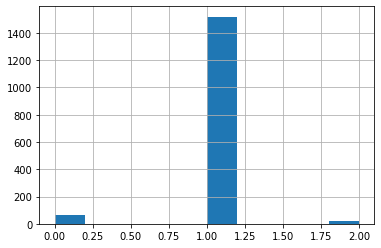

In [ ]:
wine['Quality_cat'].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(wine, wine['Quality_cat']):
  strat_train_set = wine.loc[train_index]
  strat_test_set = wine.loc[test_index]

In [ ]:
strat_test_set['Quality_cat'].value_counts()

1    304
0     13
2      3
Name: Quality_cat, dtype: int64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('quality', axis = 1, inplace = True)

In [ ]:
strat_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_cat
986,9.8,0.340,0.39,1.40,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,1
818,7.1,0.715,0.00,2.35,0.071,21.0,47.0,0.99632,3.29,0.45,9.4,1
203,7.0,0.420,0.35,1.60,0.088,16.0,39.0,0.99610,3.34,0.55,9.2,1
472,12.5,0.370,0.55,2.60,0.083,25.0,68.0,0.99950,3.15,0.82,10.4,1
1353,7.6,0.645,0.03,1.90,0.086,14.0,57.0,0.99690,3.37,0.46,10.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,9.1,0.300,0.41,2.00,0.068,10.0,24.0,0.99523,3.27,0.85,11.7,1
1367,6.9,0.540,0.30,2.20,0.088,9.0,105.0,0.99725,3.25,1.18,10.5,1
1214,10.2,0.330,0.46,1.90,0.081,6.0,9.0,0.99628,3.10,0.48,10.4,1
973,8.5,0.340,0.44,1.70,0.079,6.0,12.0,0.99605,3.52,0.63,10.7,1


In [ ]:
strat_train_data = strat_train_set.iloc[:, 0:11 ]
strat_train_target = strat_train_set.iloc[:, [11]]
strat_train_target

,Quality_cat
986,1
818,1
203,1
472,1
1353,1
...,...
1107,1
1367,1
1214,1
973,1


In [ ]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
strat_scaled_train_data = object.fit_transform(strat_train_data)
strat_scaled_train_data[0, 0:-1]

array([ 0.81851773, -1.05537108,  0.61266796, -0.80946967, -0.48564629,
       -1.23370225, -1.18403744, -1.09476262, -0.78964927, -0.65369425])

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, strat_scaled_train_data, strat_train_target, scoring='accuracy', cv=cv, n_jobs=-1)
# reporting the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Mean Accuracy: 0.949 (0.008)


In [ ]:
strat_test_data = strat_test_set.iloc[:, 0:11 ]
strat_test_target = strat_test_set.iloc[:, [11]]
strat_test_target

,Quality_cat
831,1
163,1
607,1
795,1
1267,1
...,...
1398,1
1331,1
863,1
1105,1


In [ ]:

strat_scaled_test_data = object.transform(strat_test_data)
strat_scaled_test_data[0, 0:-1]

array([-1.38141131,  0.46431575, -0.97564588, -0.31673225, -0.37231996,
        0.04734489, -0.66523515, -1.58912459,  1.61610444,  0.67898571])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(strat_scaled_train_data, strat_train_target)
preds = model.predict(strat_scaled_test_data)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confmtrx = np.array(confusion_matrix(strat_test_target, preds))
pd.DataFrame(confmtrx, index=[0, 1 , 2],
columns=['pred_0', 'pred_1', 'pred_2'])

,pred_0,pred_1,pred_2
0,0,13,0
1,0,304,0
2,0,3,0


In [ ]:
print('Accuracy Score:', metrics.accuracy_score(strat_test_target, preds))

#Creating classification report
class_report=classification_report(strat_test_target, preds)
print(class_report)

Accuracy Score: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.95      1.00      0.97       304
           2       0.00      0.00      0.00         3

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
strat_test_target.value_counts()/strat_test_target.shape[0]

Quality_cat
1              0.950000
0              0.040625
2              0.009375
dtype: float64

In [ ]:
strat_train_target.value_counts()

Quality_cat
1              1214
0                50
2                15
dtype: int64

In [ ]:
w ={0:10000, 1:0, 2:10000}

modeli = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = w)
modeli.fit(strat_scaled_train_data, strat_train_target)
predsi = model.predict(strat_scaled_test_data)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confmtrx = np.array(confusion_matrix(strat_test_target, predsi))
pd.DataFrame(confmtrx, index=[0, 1 , 2],
columns=['pred_0', 'pred_1', 'pred_2'])

,pred_0,pred_1,pred_2
0,0,13,0
1,0,304,0
2,0,3,0


In [ ]:
print('Accuracy Score:', metrics.accuracy_score(strat_test_target, predsi))

#Creating classification report
class_report=classification_report(strat_test_target, predsi)
print(class_report)

Accuracy Score: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.95      1.00      0.97       304
           2       0.00      0.00      0.00         3

    accuracy                           0.95       320
   macro avg       0.32      0.33      0.32       320
weighted avg       0.90      0.95      0.93       320



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
strat_train_target.value_counts()

Quality_cat
1              1214
0                50
2                15
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

strategy = {0:1300, 1:1250, 2:1300}
over = SMOTE(sampling_strategy=strategy)


osampled_train_data, osampled_train_target = over.fit_resample(strat_scaled_train_data, strat_train_target)
counter =  Counter(osampled_train_target)
osampled_train_target.value_counts()


/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1300) in class 0 will be larger than the number of samples in the majority class (class #1 -> 1214)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1250) in class 1 will be larger than the number of samples in the majority class (class #1 -> 1214)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (1300) in class 2 will be larger than the number of samples in the majority class (class #1 -> 1214)
  warnings.warn(


Quality_cat
0              1300
2              1300
1              1250
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs')
modelo.fit(osampled_train_data, osampled_train_target)
predso = modelo.predict(strat_scaled_test_data)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confmtrxo = np.array(confusion_matrix(strat_test_target, predso))
pd.DataFrame(confmtrxo, index=[0, 1 , 2],
columns=['pred_0', 'pred_1', 'pred_2'])

,pred_0,pred_1,pred_2
0,11,2,0
1,80,176,48
2,0,1,2


In [ ]:
print('Accuracy Score:', metrics.accuracy_score(strat_test_target, predso))

#Creating classification report
class_reporto=classification_report(strat_test_target, predso)
print(class_reporto)

Accuracy Score: 0.590625
              precision    recall  f1-score   support

           0       0.12      0.85      0.21        13
           1       0.98      0.58      0.73       304
           2       0.04      0.67      0.08         3

    accuracy                           0.59       320
   macro avg       0.38      0.70      0.34       320
weighted avg       0.94      0.59      0.70       320



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 13, n_jobs = -1)
rnd_clf.fit(osampled_train_data, osampled_train_target)
predrf=rnd_clf.predict(strat_scaled_test_data)

<ipython-input-100-5841a4384d36>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(osampled_train_data, osampled_train_target)


In [ ]:
confmtrxrf = np.array(confusion_matrix(strat_test_target, predrf))
pd.DataFrame(confmtrxrf, index=[0, 1 , 2],
columns=['pred_0', 'pred_1', 'pred_2'])

,pred_0,pred_1,pred_2
0,9,4,0
1,57,217,30
2,0,1,2


In [ ]:
print('Accuracy Score:', metrics.accuracy_score(strat_test_target, predrf))

#Creating classification report
class_reportrf=classification_report(strat_test_target, predrf)
print(class_reportrf)

Accuracy Score: 0.7125
              precision    recall  f1-score   support

           0       0.14      0.69      0.23        13
           1       0.98      0.71      0.83       304
           2       0.06      0.67      0.11         3

    accuracy                           0.71       320
   macro avg       0.39      0.69      0.39       320
weighted avg       0.93      0.71      0.79       320

